Map loaded: 7x7
Start position: (0, 0)
Goal position: (6, 6)
Nainicializovana mapa:  [[1, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 2, 0], [0, 0, 2, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 2], [0, 2, 0, 2, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0], [0, 0, 2, 0, 0, 0, 3]]
-------------------------
Greedy BFS
-------------------------
Nenasiel sa ziadny kandidat
Path until now:  [(0, 0), (1, 0), (2, 0), (3, 0), (4, 0), (5, 0), (6, 0), (6, 1)]
Greedy BFS skoncil uspesne
-------------------------
Dijkstra
-------------------------
vzdialenosti:  {(0, 0): 0, (0, 1): 1, (0, 2): 2, (0, 3): 3, (0, 4): 4, (0, 5): 5, (0, 6): 6, (1, 0): 1, (1, 1): 2, (1, 2): 3, (1, 3): 4, (1, 4): 5, (1, 6): 7, (2, 0): 2, (2, 1): 3, (2, 3): 5, (2, 4): 6, (2, 5): 7, (2, 6): 8, (3, 0): 3, (3, 1): 4, (3, 2): 5, (3, 3): 6, (3, 4): 7, (3, 5): 8, (4, 0): 4, (4, 2): 6, (4, 4): 8, (4, 5): 9, (4, 6): 10, (5, 0): 5, (5, 1): 6, (5, 2): 7, (5, 3): 8, (5, 4): 9, (5, 5): 10, (5, 6): 11, (6, 0): 6, (6, 1): 7, (6, 3): 9, (6, 4): 10, (6, 5): 11, (6, 6): 1

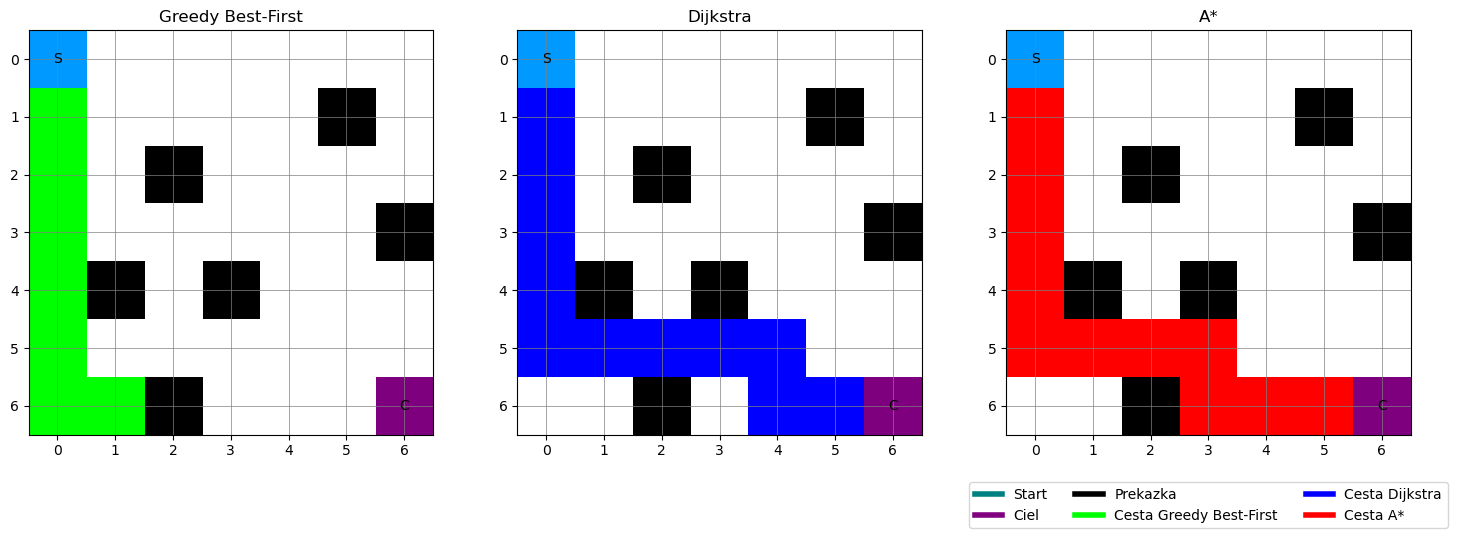

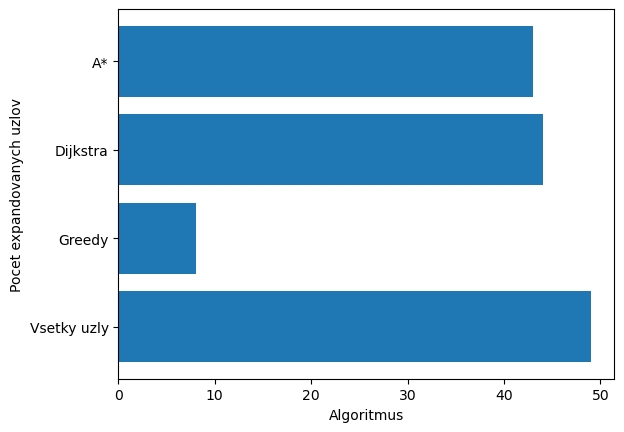

In [ ]:
#!pip install networkx numpy random heapq collections deque Counter matplotlib

import networkx as nx
import numpy as np
import random
import heapq
import matplotlib.pyplot as plt
from collections import deque, Counter

class PathFinder:
    def __init__(self, map, start, goal):
        self.map = map
        self.start = start
        self.goal = goal
        # porovnavanie expanded nodes
        self.expanded_nodes_counter = 0
        self.expanded_nodes_greedy = 0
        self.expanded_nodes_dijkstra = 0
        self.expanded_nodes_astar = 0

    def reset_counter(self):
        self.expanded_nodes_counter = 0

    def heuristic(self, node, goal):
        """
        Vypocita manhattan distance pre current node a vrati vzialenost.
        = abs(x1 - x2) + abs(y1 - y2)
        """
        return abs(node[0] - goal[0]) + abs(node[1] - goal[1])
    
    def get_neighbors(self, node):
        """
        Tato funkcia zisti susedov pre node a vrati ich suradnice.
        - podla toho kde sa nachadza node
        - vrati susedov len ak nie su out of bounds
        - filtruje prekazky: ak sused ma hodnotu 2
        """
        neighbors = []
        node_x = node[0] # riadok
        node_y = node[1] # stlpec

        # skontroluj hore ak neni v prvom riadku
        if node_x > 0:
            neighbors.append((node_x - 1, node_y))
        # skontroluj dole ak neni v poslednom riadku
        if node_x < len(self.map) - 1:
            neighbors.append((node_x + 1, node_y))
        # skontroluj vpravo ak neni v poslednom stlpci
        if node_y < (len(self.map[0]) - 1):
            neighbors.append((node_x, node_y + 1))
        # skontroluj vlavo ak neni v prvom stlpci
        if node_y > 0:
            neighbors.append((node_x, node_y - 1))

        # kontrola prekazok
        filtered_neighbors = []
        for neighbor_tuple in neighbors:
            x, y = neighbor_tuple
            if self.map[x][y] != 2:
                filtered_neighbors.append(neighbor_tuple)
        
        
        return filtered_neighbors
    
    # ==========================================================================================
    # GREEDY
    def greedy_best_first_search(self, start, goal):
        self.reset_counter()
        aktualny_riadok, aktualny_stlpec = start
        path = [(aktualny_riadok, aktualny_stlpec)] # ulozenie path
        self.expanded_nodes_counter += 1 # start node sa prida ako prvy do pocitadla

        current_heuristic = self.heuristic(start, goal)

        while current_heuristic != 0:
            neighbors = self.get_neighbors((aktualny_riadok, aktualny_stlpec))
            #print("Susedia: ", neighbors)
            
            # dalsi bod vyberame podla heuristiky
            candidates = []
            for neighbor in neighbors:
                cur_h = self.heuristic(neighbor, goal)
                if cur_h < current_heuristic:
                    candidates.append(neighbor)
                    #print("Kandidati: ", candidates)

            # zo susedov vyberame minimum
            try:
                # prevedieme kandidatov na heuristicku hodnotu
                kandidati_na_heuristiku = [self.heuristic(c, goal) for c in candidates]
                # pouzijeme to ako index pre vyber kandidata ktory ma najmensiu heuristicku hodnotu
                selected_node = candidates[kandidati_na_heuristiku.index(min(kandidati_na_heuristiku))]
                # pri random vybere je vacsia sanca ze to najde path
            except:
                # TODO: pridat ked su rovnaki susedia resp. neni mensia heuristika, co v tomto pripade neplati
                # ale moze sa to >>teoreticky<< stat pri vela prekazkach alebo podivnom grafe/podivnej mape
                print("Nenasiel sa ziadny kandidat")
                print("Path until now: ", path)
                break

            aktualny_riadok, aktualny_stlpec = selected_node
            path.append(selected_node)
            # greedy algo = no backtrack
            # nastavime heuristicku hodnotu na bod do ktoreho sme sa "dostali"
            current_heuristic = self.heuristic((aktualny_riadok, aktualny_stlpec), goal)
            self.expanded_nodes_counter += 1 # expandovali sme nodes

        print("Greedy BFS skoncil uspesne")
        return path, self.expanded_nodes_counter
    
    # ==========================================================================================
    # DIJKSTRA
    def dijkstra(self, start, goal):
        self.reset_counter()
        aktualny_riadok, aktualny_stlpec = start
        path = [(aktualny_riadok, aktualny_stlpec)] # ulozenie path
        self.expanded_nodes_counter += 1 # prvy node

        unvisited = set() # set nenavstivenych bodov
        vzdialenosti = {} # vzdialenosti od startu (dict)
        predchodcovia = {} # predchodcovia (dict)
        # obidva tieto dicty su bolest na pamat, myslim ze by sa to malo optimalizovat (hlavne predchodcovia)
        # nastav kazdemu node vzdialenost na nekonecno (ale start ma 0)
        for i in range(len(self.map)):
            for j in range(len(self.map[0])):
                if self.map[i][j] == 2:
                    continue # skip ked prekazka
                unvisited.add((i,j))
                vzdialenosti[(i,j)] = float('inf') if (i,j) != start else 0
                predchodcovia[(i,j)] = None 
        
        #print("Vzdialenosti: ", vzdialenosti)
        #print("Nenavstivene: ", unvisited)
        #print("Predchodcovia: ", predchodcovia)
        
        current_node = aktualny_riadok, aktualny_stlpec
        self.expanded_nodes_counter += 1 # start node sa prida ako prvy do pocitadla
        while unvisited and current_node != goal:
            """
            - vyber z nenavstivenych bodov ten co sa skuma ako ten  
            ktory ma najmensiu celociselnu vzdialenost
            - pre bod v ktorom sme chceme zistit vsetkych susedov
            - vypocitaj ich vzdialenosti cez current nod
            - porovnat nove vzdialenosti oproti predoslym vzdialenostiam ak tam su
                - ak je tato vzdialenost mensia tak ju tam zapiseme
            - ak spocitame vsetkych nenavstivenych susedov node v ktorom sme,
            tento node (current) sa vymaze z nenavstivenych, 
            - nastavime predchodcu na current node (kvoli zapamataniu cesty)
            lebo vzdialenost je minimalna (prvy riadok)
            - nastavime current node na ten, ktory ma najmensiu hodnotu
            > ked sa dostaneme do konecneho bodu, algoritmus konci
            - zrekonstruujeme cestu
            """
            # pocas behu vzdialenost node N je vzdialenost medzi startom a N

            # vyber skumany bod a 3 ber jeho susedov
            neighbors = self.get_neighbors(current_node)
            #print("Susedia: ", neighbors)
            # vypocitaj vzdialenosti 
            for neighbor in neighbors:
                # kontrola ci je sused v unvisited
                if neighbor in unvisited:
                    # samotny vypocet vzdialenosti (pocet krokov po cestach)
                    new_distance = vzdialenosti[current_node] + 1
                    # kontrola ci je tato nova vzdialenost mensia
                    if new_distance < vzdialenosti[neighbor]:
                        # ak je mensia, prepise sa
                        vzdialenosti[neighbor] = new_distance
                        # nastavime predchodcov
                        predchodcovia[neighbor] = current_node

            # ak su vsetci susedia navstiveni, vymaz current node z unvisited
            unvisited.remove(current_node)
            #print("current", current_node)
            # nastavime current node na ktory ma najmensiu hodnotu
            try:
                current_node = min(unvisited, key=lambda node: vzdialenosti[node])
                self.expanded_nodes_counter += 1 # zvysime pocitadlo
            except:
                # ak nemame unvisited node
                print("error neni node s mensiou vzdialenostou - sa nenasiel ciel")
                break
        print("vzdialenosti: ", vzdialenosti)

        path = []
        # hladame ciel ku ceste - rekonstrukcia cesty podla historie
        if goal in vzdialenosti and vzdialenosti[goal] != float('inf'):
            current = goal
        while current is not None:
            path.append(current)
            current = predchodcovia[current]
        # zreversujeme cestu aby bola od startu po ciel
        path.reverse()
        

        print("Dijkstra skoncil uspesne")
        return path, self.expanded_nodes_counter

    # ==========================================================================================
    # A*
    def a_star(self, start, goal):
        self.reset_counter()
        """        
        A* hlada najkratsiu cestu podla skutocnej ceny cesty od startu (g)
        a odhadovanej cesty co ciela (h)
        https://en.wikipedia.org/wiki/A*_search_algorithm
        f(n) = g(n) + h(n)
        """
        # pouzivame priority queue / heap pre openSet (nody na preskumanie)
        openSet = []
        heapq.heappush(openSet, (self.heuristic(start, goal), 0, start))  # (f_score, poradie_vlozenia, node)
        
        # overenie ci je node v openset
        openSet_hash = {start}
        
        # cameFrom[n] je node, z ktoreho pochadza najlacnejsia cesta
        cameFrom = {}
        
        # gScore[n] je najlacnejsia znama cesta zo startu do n
        gScore = {}
        gScore[start] = 0
        
        # fScore[n] = gScore[n] + h(n)
        fScore = {}
        fScore[start] = self.heuristic(start, goal)
        
        # pocitadlo pre stabilne usporiadanie pri rovnakej f hodnote
        count = 0
        
        # mnozina uzavretych (uz spracovanych) uzlov
        closedSet = set()

        self.expanded_nodes_counter += 1 # start node sa prida ako prvy do pocitadla
        
        while openSet:
            # vyber node s najnizsou f hodnotou z openSet
            _, _, current = heapq.heappop(openSet)
            openSet_hash.remove(current)
            
            # ak sme nasli ciel, zrekonstruujeme cestu
            if current == goal:
                path = []
                while current in cameFrom:
                    path.append(current)
                    current = cameFrom[current]
                path.append(start)
                path.reverse()
                print("A star skonsil uspesne")
                return path, self.expanded_nodes_counter  # vratime obratenu cestu (od startu po ciel)
            
            # pridame aktualny node do uzavretych
            closedSet.add(current)
            
            # preskumame vsetkych susedov aktualneho uzla
            for neighbor in self.get_neighbors(current):
                # preskocime susedov, ktori su uz v uzavretej mnozine
                if neighbor in closedSet:
                    continue
                    
                # vypocitame nove g skore pre suseda cez aktualny node
                # d(current, neighbor) je vaha hrany, v nasom pripade 1
                tentative_gScore = gScore.get(current, float('inf')) + 1
                
                # ked sme nasli lepsiu cestu k susedovi
                if tentative_gScore < gScore.get(neighbor, float('inf')):
                    # aktualizujeme informacie o najlepsej ceste
                    cameFrom[neighbor] = current
                    gScore[neighbor] = tentative_gScore
                    fScore[neighbor] = tentative_gScore + self.heuristic(neighbor, goal)
                    
                    # ked sused nie je v openSet, pridame ho tam
                    if neighbor not in openSet_hash:
                        count += 1
                        heapq.heappush(openSet, (fScore[neighbor], count, neighbor))
                        openSet_hash.add(neighbor)
                        self.expanded_nodes_counter += 1
        
        # ked sa dostaneme sem, nenasli sme cestu
        print("A*: Nenasla sa cesta k cielu")
        return [], self.expanded_nodes_counter  # vratime prazdnu cestu + spocitane expandovanenody

    def path_planner(self, start, goal):
        """
        Path planner funkcia - vezme start a goal tuples a v mape block.py vrati dve premenne:
        - frontu obsahujucu suvislu postupnost dvojic suradnic zo statu do ciela
        - pole expandovanych uzlov (celu mapu) na vyfarbenie
        """
        map = self.map
        paths_array = []
        #expanded_nodes = []
        
        # greedy
        print("-" * 25)
        print("Greedy BFS")
        print("-" * 25)
        path_greedy, greedy_nodes = self.greedy_best_first_search(start, goal)
        self.expanded_nodes_greedy = greedy_nodes
        paths_array.append(path_greedy)
        
        # dijkstra
        print("-" * 25)
        print("Dijkstra")
        print("-" * 25)
        path_dijkstra, dijkstra_nodes = self.dijkstra(start, goal)
        self.expanded_nodes_dijkstra = dijkstra_nodes
        paths_array.append(path_dijkstra)
        
        #astar
        print("-" * 25)
        print("A star")
        print("-" * 25)
        path_astar, astar_nodes = self.a_star(start, goal)
        self.expanded_nodes_astar = astar_nodes
        paths_array.append(path_astar)

        # premenime paths_arrays na queue
        paths = [deque(p) for p in paths_array]

        return paths, map
    
    def draw_expanded_nodes_graph(self):
        # vykresli stlpce vsetkych nodes v porovnani s expandovanymi nodes
        greedy_nodes = self.expanded_nodes_greedy
        dijkstra_nodes = self.expanded_nodes_dijkstra
        astar_nodes = self.expanded_nodes_astar        
        all_nodes = len(self.map) * len(self.map[0])
        graph_data = [all_nodes, greedy_nodes, dijkstra_nodes, astar_nodes]
        algoritmy = ['Vsetky uzly', 'Greedy', 'Dijkstra', 'A*']

        plt.barh(algoritmy, graph_data)
        plt.xlabel('Algoritmus')
        plt.ylabel('Pocet expandovanych uzlov')
        plt.show()           

def import_map_as_matrix(file_path):
    """
    Importuje 2D mapu ako maticu.
    
    subor musi obsahovat maticu so spravnym syntaxom
    - 0 je prazdne miesto
    - 1 je start position
    - 2 je prekazka
    - 3 je goal position
    """
    try:
        with open(file_path, 'r') as file:
            content = file.read()
            
        # eval function to parse the matrix representation
        matrix = eval(content)
        
        # validate: find start and goal
        start_pos = None
        goal_pos = None
        
        for i in range(len(matrix)):
            for j in range(len(matrix[i])):
                if matrix[i][j] == 1:
                    start_pos = (i, j)
                elif matrix[i][j] == 3:
                    goal_pos = (i, j)
        
        print(f"Map loaded: {len(matrix)}x{len(matrix[0])}")
        print(f"Start position: {start_pos}")
        print(f"Goal position: {goal_pos}")
        
        return matrix, start_pos, goal_pos
    
    except Exception as e:
        print(f"Error loading map: {e}")
        return None, None, None
    
def visualize_path_graphic(map, paths_array):
    """
    vizualizuje cesty na mape pomocou matplotlib.
    - map: 2d matica reprezentujuca mapu
    - paths_array: zoznam ciest, kde kazda cesta je zoznam dvojic (riadok, stlpec)
    """
    # konvertuj mapu na numpy pole
    map_array = np.array(map)
    vyska, sirka = map_array.shape
    
    # farby pre jednotlive cesty
    farby_ciest = [
        [0, 1, 0],    # zelena (greedy)
        [0, 0, 1],  # modra (dijkstra)
        [1, 0, 0] # cervena (a*)
    ]
    
    # nazvy algoritmov pre nadpisy
    nazvy_algoritmov = ["Greedy Best-First", "Dijkstra", "A*"]
    pocet_ciest = len(paths_array)
    
    # vytvor 3 grafy vedla seba
    fig, grafy = plt.subplots(1, 3, figsize=(15, 5))
    
    # pre kazdy algoritmus vytvor samostatny plot
    for i in range(pocet_ciest):
        cesta = paths_array[i]
        
        # zakladna mapa pre tento algoritmus
        zobraz_mapu = np.zeros((vyska, sirka, 3))
        
        # vyfarbi mapu
        for r in range(vyska):
            for s in range(sirka):
                if map_array[r, s] == 0:  # volne miesto (biela)
                    zobraz_mapu[r, s] = [1, 1, 1]
                elif map_array[r, s] == 1:  # start (tyrkysova)
                    zobraz_mapu[r, s] = [0, 0.6, 1]
                elif map_array[r, s] == 2:  # prekazka (cierna)
                    zobraz_mapu[r, s] = [0, 0, 0]
                elif map_array[r, s] == 3:  # ciel (fialova)
                    zobraz_mapu[r, s] = [0.5, 0, 0.5]
        
        # oznac cestu prislusnou farbou
        for r, s in cesta:
            if map_array[r, s] not in [1, 3]:  # nemen start ani ciel
                zobraz_mapu[r, s] = farby_ciest[i]
        
        # vykresli mapu
        grafy[i].imshow(zobraz_mapu)
        grafy[i].grid(True, color='gray', linestyle='-', linewidth=0.5)
        grafy[i].set_title(nazvy_algoritmov[i])
        
        # pridaj popisky pre start a ciel
        start_pozicia = np.where(map_array == 1)
        ciel_pozicia = np.where(map_array == 3)
        grafy[i].text(start_pozicia[1][0], start_pozicia[0][0], 'S', ha='center', va='center', color='black')
        grafy[i].text(ciel_pozicia[1][0], ciel_pozicia[0][0], 'C', ha='center', va='center', color='black')
    
    # pridaj legendu
    from matplotlib.lines import Line2D
    legendove_prvky = [
        Line2D([0], [0], color='teal', lw=4, label='Start'),
        Line2D([0], [0], color='purple', lw=4, label='Ciel'),
        Line2D([0], [0], color='black', lw=4, label='Prekazka')
    ]
    
    # pre kazdy algoritmus pridaj farbu do legendy
    for i in range(pocet_ciest):
        legendove_prvky.append(Line2D([0], [0], color=farby_ciest[i], lw=4, label=f"Cesta {nazvy_algoritmov[i]}"))
    
    # pridaj legendu do posledneho grafu
    grafy[-1].legend(handles=legendove_prvky, loc='upper center', 
                   bbox_to_anchor=(0.5, -0.1), ncol=3)
    
    plt.tight_layout()
    plt.show()


# ==========================================================================================
# |                                          MAIN                                          |
# ==========================================================================================

if __name__ == "__main__":
    map, start, goal = import_map_as_matrix('2Dmapa.txt')
    pathinator = PathFinder(map, start, goal)
    print("Nainicializovana mapa: ", map)
    paths_array, map = pathinator.path_planner(start, goal)
    print("=" * 30)
    print("Paths queues: ", paths_array)
    visualize_path_graphic(map, paths_array)
    pathinator.draw_expanded_nodes_graph()
